## Language is hard! 

Take a look at the following sentences: 
1. Jane went to the store
2. went the to Jane store 
3. Jane went store 
4. Jane goed store 

They (try to) express similar meanings, but some feel un-natural!  

Several things to handle: 
- Morphology
- Syntax <- touch on this 
- Semantics/World Knowledge <- touch on this but mostly shallow semantics
- Discourse 
- Pragmatics 
- Multilinguality <- focus on this

## Sentiment classification
- binary (positive, negative)
- ternary (positive, neutral, negative)
- ordinal (image below!)

<img src="../data/images/sentiment-5class.png">

Input (x): a piece of text
Output (y): a class/category (sentiment polarity here)
How: Train a function $f(x) \rightarrow y$

- How to represent text? 
- What functions? 
- How to evaluate performance


## Machine learning workflow
1. Get data
1. Inspect the data
1. Preprocess/Clean the data
1. Vector Representation
1. Modeling 
1. Evaluation

<img src="../data/images/pipeline.png">

## Text representation: tradictional bag-of-words
Given a text, extract the vocabulary, build a vector of dim $|V|$, non-zeros are words that appear. 
<img src="../data/images/textVectorization.png">


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


- Words are identified by their ids
- Non-zero means a word occurs
- The value, is the number of times the word occurs in a sentence

In [2]:
vectorizer.transform(['This is the first document', 'is document the first this']).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

- order does not matter! Recall the example with Jane ;-)
- words like 'and, the' matter the same with words like 'super, great, ..'. This is a limitation. 
- tf-idf (term frequence, inverse document frequency) is an heuristic that can get us far! 

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


Other tricks and tips: 
- Recall text is a sequence of symbols. We may care for characters instead of words (think typos) 
- We may care for longer sequences that single words: New York, not great, ..   

In [4]:
# Character grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1)) # This creates character-grams of size 1
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' ', '.', '?', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'm', 'n', 'o', 'r', 's', 't', 'u']
[[4 1 0 0 1 1 2 1 2 3 1 1 1 1 3 4 1]
 [5 1 0 0 3 3 4 0 2 2 2 3 3 0 3 4 2]
 [5 1 0 1 0 2 2 0 3 3 0 2 1 1 2 3 0]
 [4 0 1 0 1 1 2 1 2 3 1 1 1 1 3 4 1]]


N-grams are sequences of objects (objects {charactets or words}):

<img src="../data/images/ngrams.png">

In this figure notices the sliding window of size 3. While moving from left to right, it generates the possible sequences that will be used to populate the vector representations. 


**Exercise**: how to get these sequences in Python (in an elegant way)?

In [5]:
# N-grams (can be either char-grams or word-grams)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3)) # This creates character-grams of sizes 2 and 3
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

[' d', ' do', ' f', ' fi', ' i', ' is', ' o', ' on', ' s', ' se', ' t', ' th', 'an', 'and', 'co', 'con', 'cu', 'cum', 'd ', 'd d', 'd o', 'd t', 'do', 'doc', 'e ', 'e f', 'e s', 'e t', 'e.', 'ec', 'eco', 'en', 'ent', 'fi', 'fir', 'he', 'he ', 'hi', 'hir', 'his', 'ir', 'ird', 'irs', 'is', 'is ', 'me', 'men', 'nd', 'nd ', 'ne', 'ne.', 'nt', 'nt ', 'nt.', 'nt?', 'oc', 'ocu', 'on', 'ond', 'one', 'rd', 'rd ', 'rs', 'rst', 's ', 's d', 's i', 's t', 'se', 'sec', 'st', 'st ', 't ', 't d', 't i', 't.', 't?', 'th', 'the', 'thi', 'um', 'ume']
[[1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
  1 1 0 1 1 0 1 2 2 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 2 0 1 1 0 0 1 1
  1 1 0 1 0 2 1 1 1 1]
 [2 2 0 0 1 1 0 0 1 1 1 1 0 0 1 1 2 2 1 1 0 0 2 2 1 0 1 0 0 1 1 2 2 0 0 1
  1 1 0 1 0 0 0 2 2 2 2 1 1 0 0 2 1 1 0 2 2 1 1 0 0 0 0 0 2 1 0 1 1 1 0 0
  1 0 1 1 0 2 1 1 2 2]
 [0 0 0 0 1 1 1 1 0 0 3 3 1 1 0 0 0 0 2 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1
  1 2 1 1 1 1 0 2 2 0 0 1 1 1 1 0 0 0 0 0 0 1

All of the above techniques have a common limitation. The do not encode semantics! 
This means that the vector for `amazing` is completely disimilar from the vector of `great` and the of vector `Laussane`. 
Can we do better?
The answer is yes! Enter, word embeddings. 
Dense word representation, that can encode the meaning! 


In [8]:
import numpy as np
from sklearn.manifold import TSNE
vectors = open('../data/glove_excerpt.txt').read().strip().split('\n')
vectors = {line.split()[0]:np.array(line.split()[1:]).astype(float) for line in vectors}

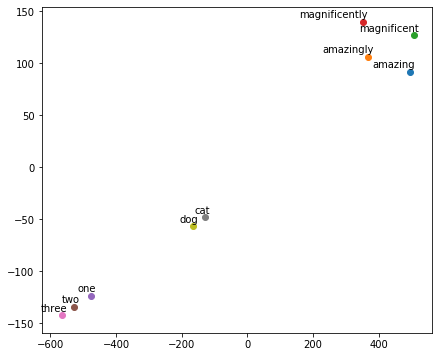

In [13]:
import matplotlib.pyplot as plt
# Let's visualize this, using TSNE, a methods that can reduce the dimensionality of the vectors
labels = list(vectors.keys())
tokens = list(vectors.values())

tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = new_values[:,0]
y = new_values[:,1]

plt.figure(figsize=(7, 6)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')


This is a great result for several reasons:
- families of similar words are close between them
- Some of them encode some syntax (magnificent and amazing) need similar vectors to approach their adverds! 